# 365 Learning Data Challenge

## Import Libraries

In [1]:
import numpy as np
import  pandas as pd
import matplotlib.pyplot as plt

import sklearn
import imblearn

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn import svm

from sklearn.metrics import ConfusionMatrixDisplay

%matplotlib inline

## Import Tables

In [2]:
course_info = pd.read_csv('365_database/365_course_info.csv')

course_ratings = pd.read_csv('365_database/365_course_ratings.csv')

exam_info = pd.read_csv('365_database/365_exam_info.csv')

quiz_info = pd.read_csv('365_database/365_quiz_info.csv')

student_engagement = pd.read_csv('365_database/365_student_engagement.csv')

student_exams = pd.read_csv('365_database/365_student_exams.csv')

student_hub_questions = pd.read_csv('365_database/365_student_hub_questions.csv')

student_info = pd.read_csv('365_database/365_student_info.csv')

student_learning = pd.read_csv('365_database/365_student_learning.csv')

student_purchases = pd.read_csv('365_database/365_student_purchases.csv')

student_quizzes = pd.read_csv('365_database/365_student_quizzes.csv')

## Examine the Table Summaries

In [3]:
course_info.head()

,course_id,course_title
0,2,Introduction to Tableau
1,3,The Complete Data Visualization Course with Py...
2,4,Introduction to R Programming
3,5,Data Preprocessing with NumPy
4,7,Introduction to Data and Data Science


In [4]:
course_ratings.head()

,course_id,student_id,course_rating,date_rated
0,14,258956,5,2022-07-06
1,7,259019,5,2022-08-30
2,23,259019,4,2022-08-30
3,14,259283,5,2022-07-08
4,30,259283,5,2022-07-02


In [5]:
exam_info.head()

,exam_id,exam_category,exam_duration
0,118,2,14
1,119,2,14
2,120,1,26
3,276,2,15
4,277,2,15


In [6]:
quiz_info.head()

,quiz_id,question_id,answer_id,answer_correct
0,1,1,1,n
1,1,1,2,y
2,1,1,3,n
3,1,1,4,n
4,2,2,5,n


In [7]:
student_engagement.head()

,engagement_id,student_id,engagement_quizzes,engagement_exams,engagement_lessons,date_engaged
0,1,274999,1,1,1,2022-05-27
1,3,274501,0,0,1,2022-05-27
2,4,272842,1,1,1,2022-05-27
3,8,275173,0,0,1,2022-05-27
4,11,274876,0,1,0,2022-05-27


In [8]:
student_exams.head()

,exam_attempt_id,student_id,exam_id,exam_result,exam_completion_time,date_exam_completed
0,173311,258803,475,83,5.17,2022-01-01
1,173332,258815,380,0,10.02,2022-01-01
2,173333,258815,380,67,7.93,2022-01-01
3,173335,258815,380,100,0.60,2022-01-01
4,173336,258815,380,0,10.02,2022-01-01


In [9]:
student_hub_questions.head()

,hub_question_id,student_id,date_question_asked
0,7619,258803,2022-01-03
1,7630,258803,2022-01-04
2,7662,259342,2022-01-05
3,7667,259391,2022-01-05
4,7668,259174,2022-01-05


In [10]:
student_info.head()

,student_id,student_country,date_registered
0,258798,IN,2022-01-01
1,258799,CO,2022-01-01
2,258800,CA,2022-01-01
3,258801,IN,2022-01-01
4,258802,US,2022-01-01


In [11]:
student_learning.head()

,student_id,course_id,minutes_watched,date_watched
0,258798,23,0.3,2022-01-01
1,258800,2,12.9,2022-04-01
2,258800,7,46.8,2022-01-03
3,258800,7,4.3,2022-01-04
4,258800,7,31.7,2022-01-07


In [12]:
student_purchases.head()

,purchase_id,student_id,purchase_type,date_purchased
0,15781,258800,Annual,2022-01-01
1,15786,258803,Annual,2022-01-01
2,15808,258862,Annual,2022-01-01
3,15809,258865,Annual,2022-01-01
4,15811,258878,Annual,2022-01-01


In [13]:
student_quizzes.head()

,student_id,quiz_id,question_id,answer_id
0,258803,537,796,3139.0
1,258803,159,793,3127.0
2,258803,159,794,3132.0
3,258803,160,181,710.0
4,258803,161,184,723.0


## Merge Relevant Tables

TODO: Boolean engagement values shall be added using student_engagement table.

In [14]:
df = pd.merge(student_learning, student_purchases, how='left', on='student_id') \
       .merge(student_info, how='left', on='student_id') \
       .merge(course_ratings, how='left', on=['student_id', 'course_id'])

In [15]:
df.head()

,student_id,course_id,minutes_watched,date_watched,purchase_id,purchase_type,date_purchased,student_country,date_registered,course_rating,date_rated
0,258798,23,0.3,2022-01-01,NaN,NaN,NaN,IN,2022-01-01,NaN,NaN
1,258800,2,12.9,2022-04-01,15781.0,Annual,2022-01-01,CA,2022-01-01,NaN,NaN
2,258800,7,46.8,2022-01-03,15781.0,Annual,2022-01-01,CA,2022-01-01,NaN,NaN
3,258800,7,4.3,2022-01-04,15781.0,Annual,2022-01-01,CA,2022-01-01,NaN,NaN
4,258800,7,31.7,2022-01-07,15781.0,Annual,2022-01-01,CA,2022-01-01,NaN,NaN


In [16]:
df.shape

(87633, 11)

In [17]:
df['purchase_type'].unique()

array([nan, 'Annual', 'Monthly', 'Quarterly'], dtype=object)

Create the Boolean target variable 'paid_subscriber'. As long as 'purchase_type' is not NAN, this value will be positive.

In [18]:
df['paid_subscriber']=df['purchase_type']
df.loc[(df['paid_subscriber']=='Annual') | (df['paid_subscriber']=='Monthly') | (df['paid_subscriber']=='Quarterly'),'paid_subscriber'] = 1
df.loc[np.isnan(list(np.array(df['paid_subscriber']))) ,'paid_subscriber'] = 0
df=df.drop(['purchase_type'],axis=1)
df.head()

,student_id,course_id,minutes_watched,date_watched,purchase_id,date_purchased,student_country,date_registered,course_rating,date_rated,paid_subscriber
0,258798,23,0.3,2022-01-01,NaN,NaN,IN,2022-01-01,NaN,NaN,0
1,258800,2,12.9,2022-04-01,15781.0,2022-01-01,CA,2022-01-01,NaN,NaN,1
2,258800,7,46.8,2022-01-03,15781.0,2022-01-01,CA,2022-01-01,NaN,NaN,1
3,258800,7,4.3,2022-01-04,15781.0,2022-01-01,CA,2022-01-01,NaN,NaN,1
4,258800,7,31.7,2022-01-07,15781.0,2022-01-01,CA,2022-01-01,NaN,NaN,1


In [19]:
df=df.drop(['student_id','purchase_id'],axis=1)
df.head()

,course_id,minutes_watched,date_watched,date_purchased,student_country,date_registered,course_rating,date_rated,paid_subscriber
0,23,0.3,2022-01-01,NaN,IN,2022-01-01,NaN,NaN,0
1,2,12.9,2022-04-01,2022-01-01,CA,2022-01-01,NaN,NaN,1
2,7,46.8,2022-01-03,2022-01-01,CA,2022-01-01,NaN,NaN,1
3,7,4.3,2022-01-04,2022-01-01,CA,2022-01-01,NaN,NaN,1
4,7,31.7,2022-01-07,2022-01-01,CA,2022-01-01,NaN,NaN,1


# Impute Missing Values

In [20]:
df.isna().sum()

course_id              0
minutes_watched        0
date_watched           0
date_purchased     27204
student_country       44
date_registered        0
course_rating      71054
date_rated         71054
paid_subscriber        0
dtype: int64

In [21]:
X = df.drop(['paid_subscriber'], axis=1)
y = df['paid_subscriber']
y=y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=365, stratify=y)

In [22]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
fit = imputer.fit_transform(X_train)
X_train = pd.DataFrame(data = fit, columns=imputer.feature_names_in_)
X_test  = pd.DataFrame(data = imputer.transform(X_test), columns=imputer.feature_names_in_)


X_train.head()


,course_id,minutes_watched,date_watched,date_purchased,student_country,date_registered,course_rating,date_rated
0,7,54.6,2022-01-14,2022-01-13,US,2022-01-13,5.0,2022-07-04
1,37,0.2,2022-04-15,2022-01-27,TN,2022-04-12,5.0,2022-07-04
2,53,35.5,2022-06-20,2022-01-27,AE,2022-06-08,5.0,2022-06-21
3,7,6.9,2022-02-08,2022-01-27,US,2022-01-19,5.0,2022-07-04
4,30,0.3,2022-04-19,2022-01-27,MA,2022-04-19,5.0,2022-07-04


In [23]:
X_train.isna().sum()

course_id          0
minutes_watched    0
date_watched       0
date_purchased     0
student_country    0
date_registered    0
course_rating      0
date_rated         0
dtype: int64

## Create New Columns

Create some new columns by taking differences of dates compared to registration date.

In [24]:
X_train['days_watched_after_reg'] = (pd.to_datetime(X_train['date_watched']) - pd.to_datetime(X_train['date_registered'])).dt.days
X_train['days_purchased_after_reg'] = (pd.to_datetime(X_train['date_purchased']) - pd.to_datetime(X_train['date_registered'])).dt.days
X_train['days_rated_after_reg'] = (pd.to_datetime(X_train['date_rated']) - pd.to_datetime(X_train['date_registered'])).dt.days

X_test['days_watched_after_reg'] = (pd.to_datetime(X_test['date_watched']) - pd.to_datetime(X_test['date_registered'])).dt.days
X_test['days_purchased_after_reg'] = (pd.to_datetime(X_test['date_purchased']) - pd.to_datetime(X_test['date_registered'])).dt.days
X_test['days_rated_after_reg'] = (pd.to_datetime(X_test['date_rated']) - pd.to_datetime(X_test['date_registered'])).dt.days

X_train.head()

,course_id,minutes_watched,date_watched,date_purchased,student_country,date_registered,course_rating,date_rated,days_watched_after_reg,days_purchased_after_reg,days_rated_after_reg
0,7,54.6,2022-01-14,2022-01-13,US,2022-01-13,5.0,2022-07-04,1,0,172
1,37,0.2,2022-04-15,2022-01-27,TN,2022-04-12,5.0,2022-07-04,3,-75,83
2,53,35.5,2022-06-20,2022-01-27,AE,2022-06-08,5.0,2022-06-21,12,-132,13
3,7,6.9,2022-02-08,2022-01-27,US,2022-01-19,5.0,2022-07-04,20,8,166
4,30,0.3,2022-04-19,2022-01-27,MA,2022-04-19,5.0,2022-07-04,0,-82,76


Drop columns that became unnecessary after creation of the previous ones.

In [25]:
X_train=X_train.drop(['date_watched','date_purchased','date_rated','date_registered'],axis=1)
X_test=X_test.drop(['date_watched','date_purchased','date_rated','date_registered'],axis=1)

X_train.head()

,course_id,minutes_watched,student_country,course_rating,days_watched_after_reg,days_purchased_after_reg,days_rated_after_reg
0,7,54.6,US,5.0,1,0,172
1,37,0.2,TN,5.0,3,-75,83
2,53,35.5,AE,5.0,12,-132,13
3,7,6.9,US,5.0,20,8,166
4,30,0.3,MA,5.0,0,-82,76


In [26]:
X_train['course_id'].unique()

array([7, 37, 53, 30, 14, 42, 35, 21, 5, 23, 45, 16, 15, 32, 29, 2, 33,
       26, 3, 20, 24, 4, 22, 34, 12, 39, 36, 46, 25, 28, 11, 54, 27, 13,
       48, 41, 44, 52, 50, 55, 51, 49, 19, 43, 67, 57, 56, 59, 66, 65],
      dtype=object)

## One Hot Encoding

Two variables are categorical in nature at this point. These are 'course_id' and 'student_country'. They are one-hot encoded here.

In [27]:
course_id_onehot=pd.get_dummies(X_train['course_id'],prefix='course_id')

In [28]:
X_train_len=X_train.shape[0]
X_concat=pd.concat([X_train,X_test],ignore_index = True, sort = False)

course_id_onehot=pd.get_dummies(X_concat['course_id'],prefix='course_id')
X_concat = X_concat.join(course_id_onehot)
student_country_onehot=pd.get_dummies(X_concat['student_country'],prefix='student_country')
X_concat = X_concat.join(student_country_onehot)

X_concat = X_concat.drop(['course_id','student_country'],axis=1)

X_concat.head()

,minutes_watched,course_rating,days_watched_after_reg,days_purchased_after_reg,days_rated_after_reg,course_id_2,course_id_3,course_id_4,course_id_5,course_id_7,...,student_country_UZ,student_country_VC,student_country_VE,student_country_VN,student_country_VU,student_country_XK,student_country_YE,student_country_ZA,student_country_ZM,student_country_ZW
0,54.6,5.0,1,0,172,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.2,5.0,3,-75,83,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,35.5,5.0,12,-132,13,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6.9,5.0,20,8,166,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.3,5.0,0,-82,76,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
X_train = X_concat[:X_train_len]
X_test = X_concat[X_train_len:]

In [30]:
X_train.columns

Index(['minutes_watched', 'course_rating', 'days_watched_after_reg',
       'days_purchased_after_reg', 'days_rated_after_reg', 'course_id_2',
       'course_id_3', 'course_id_4', 'course_id_5', 'course_id_7',
       ...
       'student_country_UZ', 'student_country_VC', 'student_country_VE',
       'student_country_VN', 'student_country_VU', 'student_country_XK',
       'student_country_YE', 'student_country_ZA', 'student_country_ZM',
       'student_country_ZW'],
      dtype='object', length=228)

## Min-max scaling

In [31]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=scaler.feature_names_in_)

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=scaler.feature_names_in_)

In [32]:
X_train.head()

,minutes_watched,course_rating,days_watched_after_reg,days_purchased_after_reg,days_rated_after_reg,course_id_2,course_id_3,course_id_4,course_id_5,course_id_7,...,student_country_UZ,student_country_VC,student_country_VE,student_country_VN,student_country_VU,student_country_XK,student_country_YE,student_country_ZA,student_country_ZM,student_country_ZW
0,0.035324,1.0,0.003436,0.492593,0.719794,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000129,1.0,0.010309,0.353704,0.491003,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.022967,1.0,0.041237,0.248148,0.311054,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.004464,1.0,0.068729,0.507407,0.704370,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000194,1.0,0.000000,0.340741,0.473008,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Balancing Training Set

In [33]:
over_sampler=RandomOverSampler(random_state=365)
X_train, y_train = over_sampler.fit_resample(X_train, y_train)
under_sampler=RandomUnderSampler(random_state=365)
X_train, y_train = under_sampler.fit_resample(X_train, y_train)

In [34]:
X_train.head()

,minutes_watched,course_rating,days_watched_after_reg,days_purchased_after_reg,days_rated_after_reg,course_id_2,course_id_3,course_id_4,course_id_5,course_id_7,...,student_country_UZ,student_country_VC,student_country_VE,student_country_VN,student_country_VU,student_country_XK,student_country_YE,student_country_ZA,student_country_ZM,student_country_ZW
0,0.000129,1.0,0.010309,0.353704,0.491003,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.022967,1.0,0.041237,0.248148,0.311054,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.004464,1.0,0.068729,0.507407,0.704370,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000194,1.0,0.000000,0.340741,0.473008,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.043670,1.0,0.010309,0.103704,0.143959,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
print(X_test.shape)
print(y_test.shape)

(17527, 228)
(17527,)


## Train the Model

In [36]:
SVMClassifier = svm.SVC(random_state=365)
SVMClassifier.fit(X_train, y_train)

SVC(random_state=365)

In [37]:
y_pred = SVMClassifier.predict(X_test)

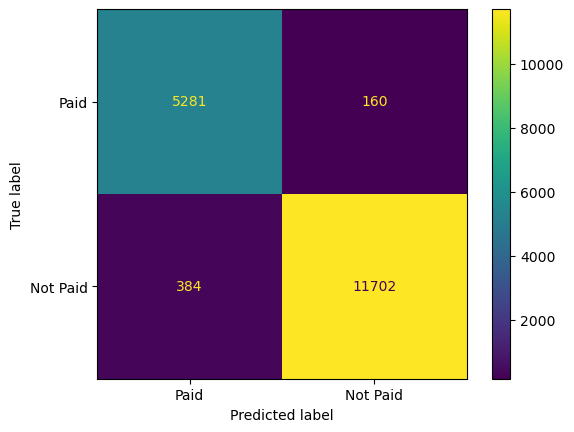

In [38]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Paid', 'Not Paid'])